# Imports (Start here)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from thefuzz import fuzz, process
import missingno as msno
from salmonella_study import utils
from salmonella_study.data_processing import get_population, modify_county_names
from salmonella_study.config import Config

pd.options.display.max_columns = 200
pd.options.display.max_rows = 20

In [2]:
RAW_DATA_DIR = Config.RAW_DATA_DIR
PROCESSED_DATA_DIR = Config.PROCESSED_DATA_DIR

print(RAW_DATA_DIR)
print(PROCESSED_DATA_DIR)


C:/Users/Zayan/Documents/code/personal_repos/salmonella_study\data\raw
C:/Users/Zayan/Documents/code/personal_repos/salmonella_study\data\processed


# MMG

## 2019-2020

In [3]:
MMG_dir = os.path.join(RAW_DATA_DIR, 'MMG')
MMG_2019_to_2020_data = pd.read_excel(f"{MMG_dir}/MMG2022_2020-2019Data_ToShare.xlsx", sheet_name="County")

In [3]:
MMG_2019_to_2020_data.head()

,FIPS,State,"County, State",Year,Overall Food Insecurity Rate (1 Year),# of Food Insecure Persons Overall (1 Year),Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall
0,1001,AL,"Autauga County, Alabama",2020,0.145,8070,0.25,NaN,0.09,1.3,SNAP,1.85,Other Nutrition Program,0.476,0.147,0.377,0.181,2380,0.71,0.29,3.22,17.092792,4184000
1,1003,AL,"Baldwin County, Alabama",2020,0.124,27070,0.24,0.11,0.08,1.3,SNAP,1.85,Other Nutrition Program,0.375,0.223,0.403,0.120,5650,0.82,0.18,3.72,19.723135,16195000
2,1005,AL,"Barbour County, Alabama",2020,0.195,4870,0.32,0.24,0.11,1.3,SNAP,1.85,Other Nutrition Program,0.615,0.070,0.315,0.334,1740,0.82,0.18,3.19,16.956475,2505000
3,1007,AL,"Bibb County, Alabama",2020,0.164,3680,0.32,0.08,0.11,1.3,SNAP,1.85,Other Nutrition Program,0.484,0.222,0.295,0.216,990,0.87,0.13,3.09,16.405401,1831000
4,1009,AL,"Blount County, Alabama",2020,0.138,7980,0.16,0.14,0.11,1.3,SNAP,1.85,Other Nutrition Program,0.452,0.293,0.255,0.127,1700,1.00,0.00,3.06,16.264257,3937000


In [6]:
MMG_2019_to_2020_data['Low Threshold Type'].unique()

array(['SNAP', 'SNAP, Other Nutrition Programs'], dtype=object)

In [5]:
MMG_2019_to_2020_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   FIPS                                                        6285 non-null   int64  
 1   State                                                       6285 non-null   object 
 2   County, State                                               6285 non-null   object 
 3   Year                                                        6285 non-null   int64  
 4   Overall Food Insecurity Rate (1 Year)                       6285 non-null   float64
 5   # of Food Insecure Persons Overall (1 Year)                 6285 non-null   int64  
 6   Food Insecurity Rate among Black Persons (all ethnicities)  3047 non-null   float64
 7   Food Insecurity Rate among Hispanic Persons (any race)      3560 non-null   float64
 8 

<Axes: >

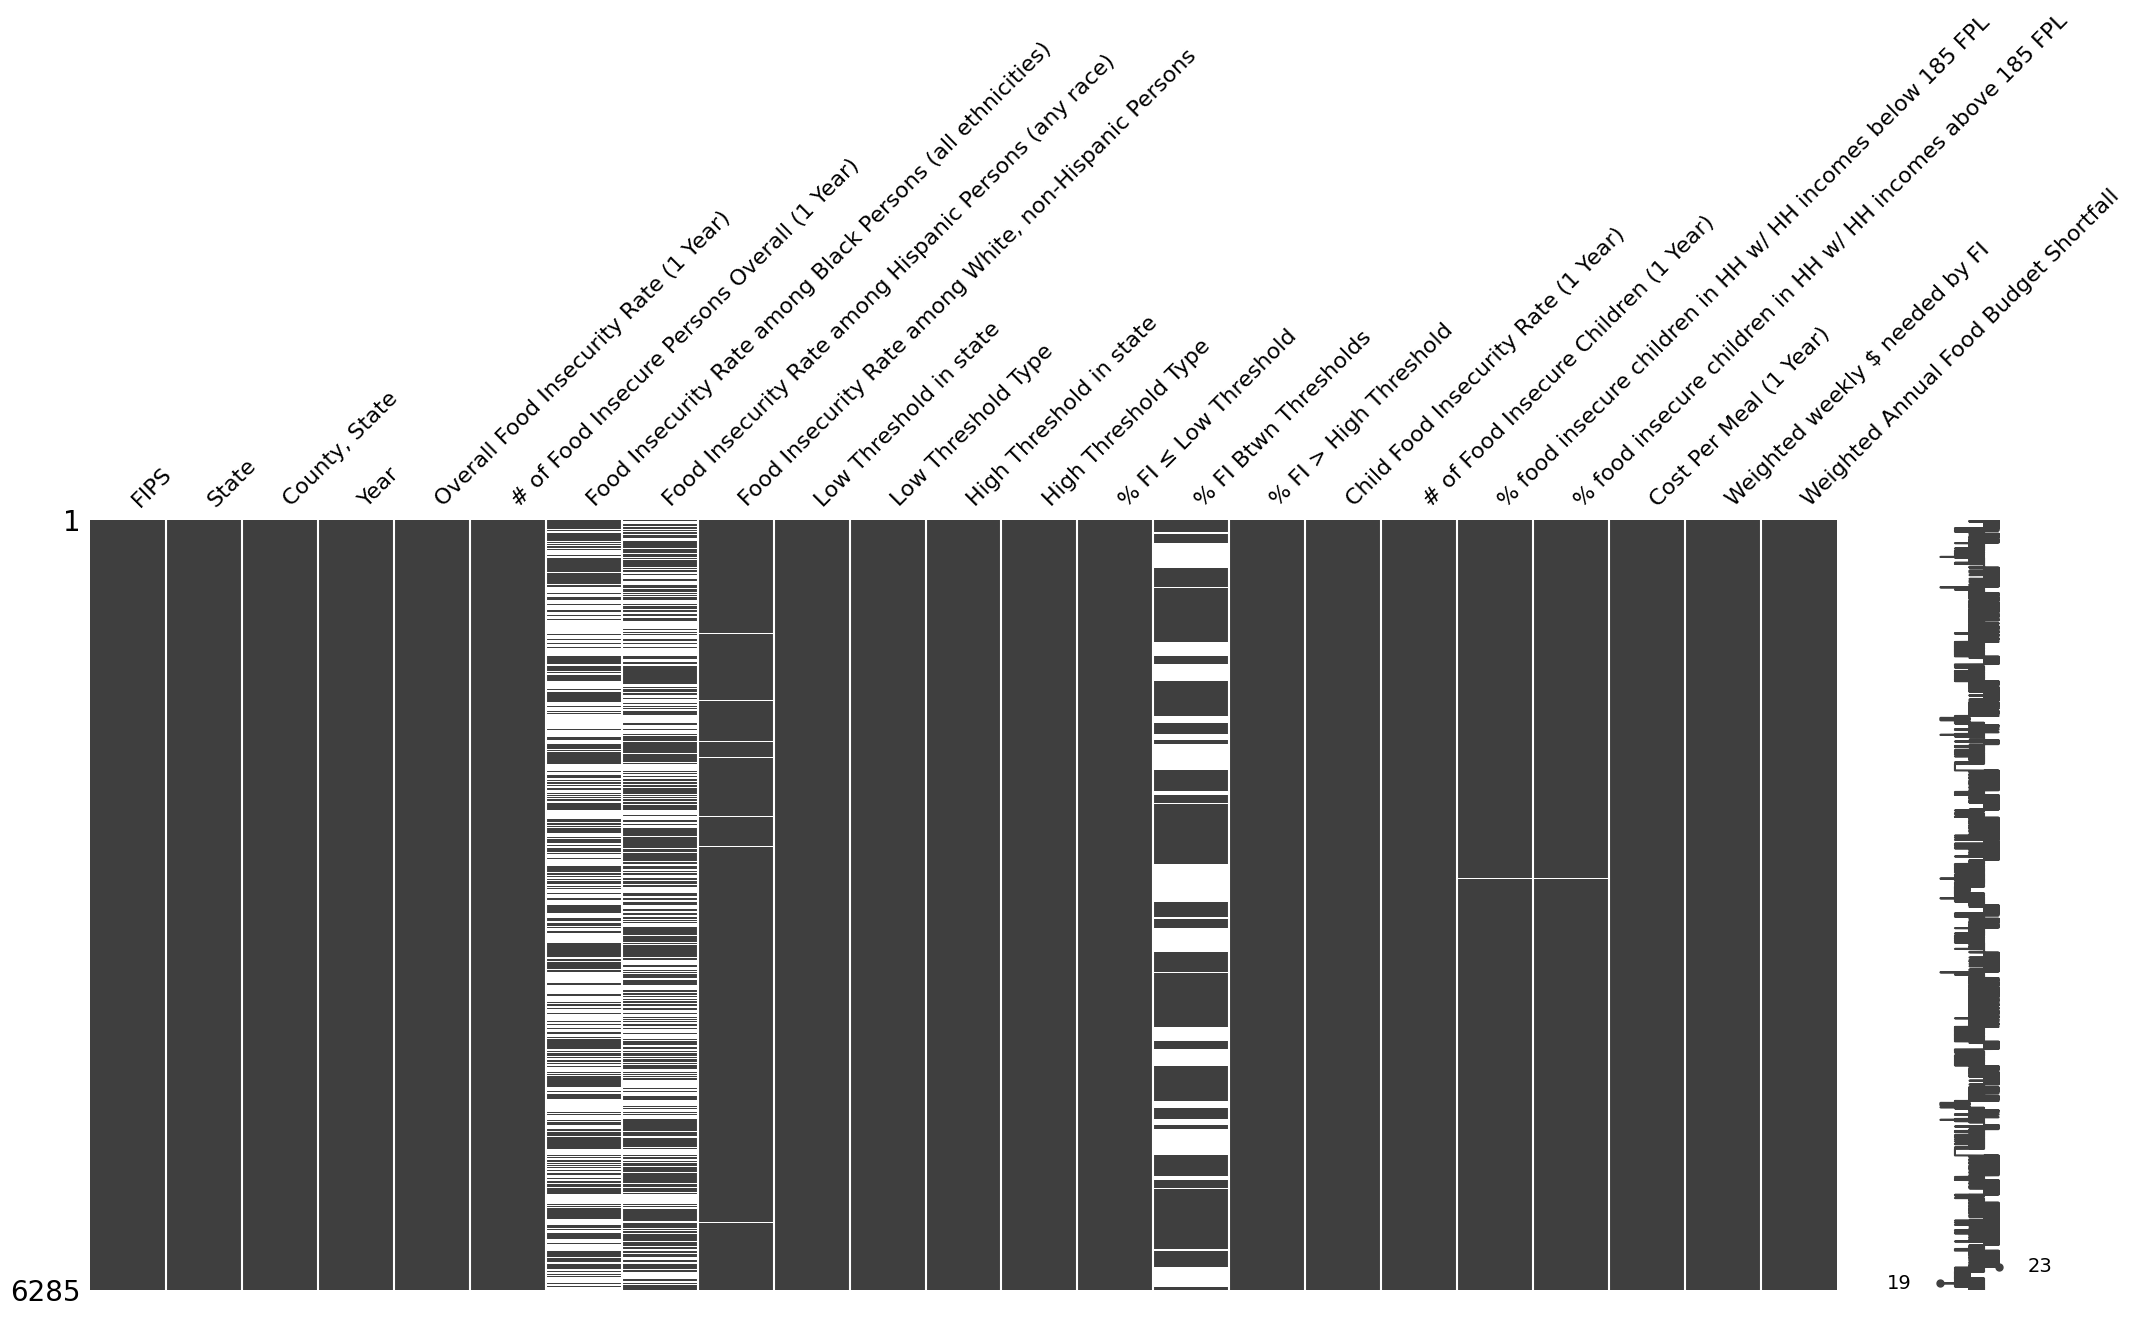

In [4]:
msno.matrix(MMG_2019_to_2020_data)

In [4]:
MMG_2019_to_2020_data['County, State']

0          Autauga County, Alabama
1          Baldwin County, Alabama
2          Barbour County, Alabama
3             Bibb County, Alabama
4           Blount County, Alabama
                   ...            
6280    Sweetwater County, Wyoming
6281         Teton County, Wyoming
6282         Uinta County, Wyoming
6283      Washakie County, Wyoming
6284        Weston County, Wyoming
Name: County, State, Length: 6285, dtype: object

### MO


In [7]:
MMG_mo = MMG_2019_to_2020_data.loc[MMG_2019_to_2020_data['State'] == 'MO']

In [8]:
MMG_mo

,FIPS,State,"County, State",Year,Overall Food Insecurity Rate (1 Year),# of Food Insecure Persons Overall (1 Year),Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall
1484,29001,MO,"Adair County, Missouri",2020,0.135,3440,NaN,NaN,0.14,1.3,SNAP,1.85,Other Nutrition Program,0.653,0.113,0.234,0.129,610,0.89,0.11,2.94,15.582552,1626000
1485,29003,MO,"Andrew County, Missouri",2020,0.094,1650,NaN,NaN,0.07,1.3,SNAP,1.85,Other Nutrition Program,0.425,0.185,0.389,0.088,360,0.94,0.06,2.97,15.774208,789000
1486,29005,MO,"Atchison County, Missouri",2020,0.119,620,NaN,NaN,0.10,1.3,SNAP,1.85,Other Nutrition Program,0.487,0.258,0.256,0.140,140,0.91,0.09,3.23,17.148613,323000
1487,29007,MO,"Audrain County, Missouri",2020,0.138,3490,0.19,0.19,0.11,1.3,SNAP,1.85,Other Nutrition Program,0.537,0.197,0.266,0.182,1060,0.98,0.02,2.89,15.335352,1623000
1488,29009,MO,"Barry County, Missouri",2020,0.145,5170,NaN,0.15,0.11,1.3,SNAP,1.85,Other Nutrition Program,0.545,0.203,0.252,0.191,1540,0.91,0.09,2.96,15.728063,2467000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,29223,MO,"Wayne County, Missouri",2019,0.211,2780,NaN,NaN,0.18,1.3,SNAP,1.85,Other Nutrition Program,0.626,0.150,0.224,0.239,680,0.87,0.13,2.75,15.472633,1305000
4737,29225,MO,"Webster County, Missouri",2019,0.151,5850,NaN,0.14,0.13,1.3,SNAP,1.85,Other Nutrition Program,0.539,0.148,0.313,0.178,1860,0.84,0.17,2.95,16.635108,2952000
4738,29227,MO,"Worth County, Missouri",2019,0.134,270,NaN,NaN,0.12,1.3,SNAP,1.85,Other Nutrition Program,0.451,0.180,0.369,0.159,70,0.89,0.12,3.14,17.703223,145000
4739,29229,MO,"Wright County, Missouri",2019,0.195,3560,NaN,NaN,0.17,1.3,SNAP,1.85,Other Nutrition Program,0.655,0.188,0.157,0.250,1160,0.90,0.11,2.79,15.750412,1701000


Check county names

In [10]:
MMG_mo['County, State'].nunique()

115

In [12]:
MMG_mo.groupby('County, State').count().reset_index()

,"County, State",FIPS,State,Year,Overall Food Insecurity Rate (1 Year),# of Food Insecure Persons Overall (1 Year),Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall
0,"Adair County, Missouri",2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,"Andrew County, Missouri",2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,"Atchison County, Missouri",2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,"Audrain County, Missouri",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,"Barry County, Missouri",2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,"Barton County, Missouri",2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,"Bates County, Missouri",2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,"Benton County, Missouri",2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,"Bollinger County, Missouri",2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
9,"Boone County, Missouri",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


# NORS data

**Instructions:**

The data provided were extracted using the following methodology:

 

1. mode of transmission = food, animal contact, indeterminate/unknown/other
outbreak report has been finalized
2. onset year between 1998 and 2021 for foodborne, 2009 and 2021 for animal contact and indeterminate/unknown/other modes of transmission
3. number of estimated primary illnesses greater than 1
4. genus = Salmonella
5. outbreaks with a confirmed or suspected etiology of Salmonella, including those with additional non-Salmonella etiologies reported
county information is included; counties are redacted where EstimatedPrimary < 5
 

The attached data are provided in a relational format. In this format, multiple values are allowed for a single variable. For example, if two etiologies were reported for a single outbreak, these etiologies will be listed as two rows within a single column of the Etiology table. Use the table named 'NORSMain' as a guide to determine the total number of outbreaks reported. This table is flat, so it does not allow multiple values for a single record. The number of records in this table represents the number of outbreak reports contained within the entire dataset. **Most tables link to the NORSMain table using the CDCID variable**. 

 

Your data request includes historical data that were reported to CDC via other systems before NORS was implemented. “Data Collection Activities and Instruments” on page 1 of the NORS Data Documentation provides more information about these systems. Please note that there have been differences in data collection methods and data management processes among systems. Comparisons of 2009–present data with previous years should, therefore, be made with caution.

 

If you plan on pursuing this project further and possibly wish to publish a scientific manuscript we request that you include a NORS team member as a coauthor. This person will assist with data interpretation and with drafting of the manuscript, specifically the methods and limitation sections. Your point of contact for this project is <Sonny Hoang, sro7@cdc.gov>.

 

Please use the following suggested citation to reference NORS data used for a manuscript or scientific publication:

Centers for Disease Control and Prevention (CDC). National Outbreak Reporting System. Atlanta, Georgia: U.S. Department of Health and Human Services, CDC. Download date <date, e.g., 05Jan2018>.

 

Please see the NORS website (https://www.cdc.gov/nors/index.html) and the attached two-page document named “NORS Data Documentation” for more information about the system, outbreak reporting, data management, analytic caveats, and data limitations.

## Data dictionary

In [25]:
NORS_dir = os.path.join(raw_data_dir, 'National Outbreak Reporting System')
NORS_data_dictionary_xlsx = pd.ExcelFile(os.path.join(NORS_dir, 'data dictionary.xlsx'))

print(NORS_data_dictionary_xlsx.sheet_names)

['All Variables-by table']


In [28]:
NORS_metadata = pd.read_excel(NORS_data_dictionary_xlsx, sheet_name=NORS_data_dictionary_xlsx.sheet_names[0], skiprows=1)

NORS_metadata

,Download Variable Order,Table/Tab Name,Variable Name,Form Marker,Form-Page and Section,Form Name,NORS Interface- Tab and Section,Format,Comments
0,1,NORSMain,CDCID,G1,"Page 1, CDC Use Only",52.12 and 52.13,NaN,Number,CDC Report ID. Links record from a single NOR...
1,2,NORSMain,eFORSID,NaN,NaN,NaN,NaN,Number,This is the unique ID previously assigned to a...
2,3,NORSMain,StateID,G2,Page 1,52.12 and 52.13,NaN,Text,The report ID entered by the reporting site. ...
3,4,NORSMain,NORSUserID,NaN,NaN,NaN,NaN,Text,User ID of person who created the report
4,5,NORSMain,RecordStatus,NaN,NaN,NaN,NaN,Text,"Indicates whether the report is active, finali..."
...,...,...,...,...,...,...,...,...,...
502,503,Finalization_Issues,NORSUserID,NaN,NaN,52.12 and 52.13,NaN,Text,User ID of person who created the report
503,504,Finalization_Issues,IssueStatus,NaN,NaN,NaN,Finalize,Text,Indicates whether the finalization issue for t...
504,505,Finalization_Issues,IssueName,NaN,NaN,NaN,Finalize,Text,Name of the finalization issue flagged for the...
505,506,Finalization_Issues,IssueResponse,NaN,NaN,NaN,Finalize,Text,"Response to finalization issue, if addressed (..."


In [33]:
print(NORS_metadata['Table/Tab Name'].nunique(), "Unique tables:")
NORS_metadata['Table/Tab Name'].unique()

65 Unique tables:


array(['NORSMain', 'Attachments', 'InvestigationMethod', 'States',
       'Counties', 'Symptoms', 'SecondaryTransmissionMode\n', 'Traceback',
       'GenLab', 'GenEtiology', 'GenIsolates', 'FB_FoodMain',
       'FB_FoodborneContaminationPoint', 'FB_FoodImplicated',
       'FB_ReasonSuspected', 'FB_Ingredients', 'FB_MethodofProc',
       'FB_MethodofPrep', 'FB_LevelofPrep', 'FB_WherePrep',
       'FB_WhereEaten', 'FB_ContributingFactors', 'FB_School',
       'FB_SchoolLevel', 'FB_SchoolPrep', 'FB_GroundBeef', 'FB_SEPhage',
       'FB_Egg', 'Setting', 'OtherSetting', 'Shigella', 'AnimalMain',
       'AnimalFeed', 'AnimalVehicle', 'AnimalSetting', 'AnimalPrevention',
       'WB_WaterMain', 'WB_RouteofEntry', 'WB_Epi_Results', 'WB_Etiology',
       'WB_Isolates', 'WB_Specimens', 'WB_TestedFor', 'WB_TestTypes',
       'WB_AST', 'WB_Samples', 'WB_Samples_Source',
       'WB_Samples_Indicator', 'WB_Samples_Analysis', 'WB_IntendedUse',
       'WB_WaterType', 'WB_Rec_Treatment', 'WB_Rec_FillWat

In [42]:
print(NORS_metadata['Variable Name'].nunique(), 'Unique variables')

423 Unique variables


## Data

### 2023-03-17

In [2]:
NORS_dir = os.path.join(raw_data_dir, 'National Outbreak Reporting System')
NORS_xlsx = pd.ExcelFile(os.path.join(NORS_dir, 'TROU_20230317_For Release2.xlsx'))

# check number of sheets
print("Number of sheets: ", len(NORS_xlsx.sheet_names), '\n')
for sheet in NORS_xlsx.sheet_names:
    print(sheet)

# load data from every sheet to a dataframe of its own
dfs = {}
for sheet in NORS_xlsx.sheet_names:
    dfs[sheet] = pd.read_excel(NORS_xlsx, sheet_name=sheet)

Number of sheets:  39 

NORSMain
InvestigationMethod
States
Counties
Symptoms
SecondaryTransmissionMode
Traceback
GenLab
GenEtiology
GenIsolates
FB_FoodMain
FB_ContaminationPoint
FB_FoodImplicated
FB_ReasonSuspected
FB_Ingredients
FB_MethodofProc
FB_MethodofPrep
FB_LevelofPrep
FB_WherePrep
FB_WhereEaten
FB_ContributingFactors
FB_School
FB_SchoolLevel
FB_GroundBeef
FB_SEPhage
FB_Egg
FB_IFSACCommodity
Setting
OtherSetting
Shigella
AnimalMain
AnimalFeed
AnimalVehicle
AnimalSetting
AnimalPrevention
EforsAge
EforsAttackRate
EforsFoodContributingFactor
EforsFoodMethodOfPreparation


In [21]:
dfs['NORSMain']

,CDCID,RecordStatus,PrimaryMode,InvestigationComments,DateLastIll,InitialExposure,LastExposure,CDCReportDate,LocalReportDate,ExposureState,MultiStateExposure,MultiStateResidence,ExposureCounty,MultiCountyExposure,MultiCountyResidence,ConfirmedPrimary,ProbablePrimary,EstimatedPrimary,DeathsNum,DeathsInfo,HospitalNum,HospitalInfo,ERNum,ERInfo,HealthcareNum,HealthcareInfo,NumberMale,PercentMale,NumberFemale,PercentFemale,NumberSexUnknown,PercentSexUnknown,NumberAgeUnder1,PercentAgeUnder1,NumberAge1to4,PercentAge1to4,NumberAge5to9,PercentAge5to9,NumberAge10to19,PercentAge10to19,NumberAge20to49,PercentAge20to49,NumberAge50to74,PercentAge50to74,NumberAge75plus,PercentAge75plus,NumberAgeUnknown,PercentAgeUnknown,IncShort,IncShortUnit,IncMedian,IncMedianUnit,IncLong,IncLongUnit,IncubationNum,IncUnknown,DurShort,DurShortUnit,DurMedian,DurMedianUnit,DurLong,DurLongUnit,DurationNum,DurUnknown,ConfirmedSecondary,ProbableSecondary,TotalSecondary,TotalCases,NEARSID1,NEARSID2,NEARSID3,NEARSID4,OHHABSID1,OHHABSID2,TracebackConducted,Recall,RecallItem,RecallComments,GeneralComments,DateFirstIll,yearfirstill,monthfirstill
0,55,Finalized,Food,NaN,2009-01-25,2009-01-10,2009-01-23,NaT,NaT,Illinois,0,0,Lake,0.0,0.0,7.0,0.0,7,0.0,7.0,2.0,7.0,2.0,7.0,4.0,7.0,NaN,14.00,NaN,86.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,14.00,NaN,57.00,NaN,0.00,NaN,29.00,NaN,0.00,NaN,0.0,21.0,Hours,40.0,Hours,54.0,Hours,7.0,0.0,2.0,Days,3.0,Days,5.0,Days,7.0,0.0,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Multiple households developed S. ser. Enteriti...,2009-01-11,2009,1
1,83,Finalized,Food,3/5 cases ate at the same Mexican restaurant t...,2009-02-08,NaT,NaT,NaT,NaT,Massachusetts,0,0,Multicounty,1.0,0.0,5.0,0.0,5,0.0,5.0,0.0,5.0,NaN,NaN,5.0,5.0,NaN,20.00,NaN,80.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,100.00,NaN,0.00,NaN,0.00,NaN,NaN,NaN,Hours,NaN,Hours,NaN,Hours,NaN,1.0,4.0,Days,NaN,Hours,23.0,Days,5.0,0.0,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2009-01-11,2009,1
2,109,Finalized,Food,NaN,NaT,NaT,NaT,2009-04-10,NaT,Massachusetts,0,0,***,1.0,0.0,2.0,0.0,2,0.0,2.0,0.0,1.0,2.0,2.0,0.0,2.0,NaN,50.00,NaN,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hours,NaN,Hours,NaN,Hours,NaN,1.0,NaN,Hours,NaN,Hours,NaN,Hours,NaN,1.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2009-02-11,2009,2
3,176,Finalized,Food,NaN,2009-03-13,2009-02-28,2009-03-07,NaT,NaT,Illinois,0,0,Cook,0.0,1.0,6.0,NaN,6,0.0,6.0,0.0,6.0,NaN,NaN,6.0,6.0,NaN,40.00,NaN,60.00,NaN,NaN,NaN,0.00,NaN,28.50,NaN,0.00,NaN,0.00,NaN,14.28,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Days,4.0,Days,4.0,Days,NaN,0.0,NaN,Hours,NaN,Hours,NaN,Hours,NaN,1.0,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Seven cases of S. Typhimurium with same PFGE p...,2009-03-03,2009,3
4,180,Finalized,Food,NaN,2009-03-26,NaT,NaT,NaT,2009-04-06,Illinois,0,0,Cook,0.0,0.0,5.0,0.0,5,0.0,5.0,0.0,5.0,1.0,5.0,4.0,5.0,NaN,80.00,NaN,20.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,100.00,NaN,0.00,NaN,0.00,NaN,0.0,2.0,Days,2.0,Days,2.0,Days,2.0,0.0,NaN,Hours,NaN,Hours,NaN,Hours,NaN,1.0,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,An increase over the number of expected S. Ent...,2009-03-12,2009,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,302939,Finalized,Animal Contact,NaN,2022-09-12,NaT,NaT,2022-05-03,2022-05-04,Multistate,1,0,NaN,0.0,0.0,28.0,0.0,28,0.0,13.0,10.0,13.0,NaN,NaN,NaN,NaN,14.0,50.00,13.0,46.43,1.0,3.57,3.0,10.71,3.0,10.71,8.0,28.57,4.0,14.29,6.0,21.43,3.0,10.71,1.0,3.57,0.0,0.0,NaN,Hours,NaN,Hours,NaN,Hours,NaN,0.0,NaN,Hours,NaN,Hours,NaN,Hours,NaN,0.0,0.0,0.0,0.0,28,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2021-09-21,2021,9
3946,303185,Finalized,Animal Contact,This in

In [43]:
dfs['NORSMain'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CDCID                  3950 non-null   int64         
 1   RecordStatus           3950 non-null   object        
 2   PrimaryMode            3950 non-null   object        
 3   InvestigationComments  1030 non-null   object        
 4   DateLastIll            2817 non-null   datetime64[ns]
 5   InitialExposure        2189 non-null   datetime64[ns]
 6   LastExposure           1928 non-null   datetime64[ns]
 7   CDCReportDate          672 non-null    datetime64[ns]
 8   LocalReportDate        1861 non-null   datetime64[ns]
 9   ExposureState          3950 non-null   object        
 10  MultiStateExposure     3950 non-null   int64         
 11  MultiStateResidence    3950 non-null   int64         
 12  ExposureCounty         3285 non-null   object        
 13  Mul

In [4]:
dfs['FB_MethodofProc']['MethodOfProcessing'].nunique()

12

In [5]:
dfs['FB_MethodofPrep']['MethodOfPreparation'].nunique()

10

# PN data

## PN 2020-2023

In [3]:
PN_2020_to_2023_path = f"c:/Users/Zayan/Documents/code/personal_repos/salmonella/Data/raw_data/PulseNet data/Export_2020-2023.xlsx"
if os.path.exists(PN_2020_to_2023_path):
    PN_2020_to_2023_data = pd.read_excel(PN_2020_to_2023_path, sheet_name="2020-2023")
else:
    print(f"path {PN_2020_to_2023_path} does not exist")

In [5]:
PN_2020_to_2023_data.head()

,Key,AntigenForm,AntigenForm_wgs,IsolatDate,LabID,Outbreak,PatientAgeDays,PatientAgeMonths,PatientAgeYears,PatientSex,PulseNet_UploadDate,Serotype,Serotype_wgs,SourceCity,SourceCountry,SourceCounty,SourceSite,SourceState,SourceType,TypeDetails,WGS_id,Unnamed: 21
0,FL___JBS19003284,NaN,"I 7:e,h:e,n,z15",2019-11-21 00:00:00,FL,NaN,NaN,NaN,19,FEMALE,2020-01-02,NaN,Braenderup,Gainesville,USA,Alachua,Stool,FL,Human,NaN,PNUSAS126185,NaN
1,FL___JBS19003283,NaN,"I 9:g,m:-",2019-11-25 00:00:00,FL,NaN,NaN,NaN,4,MALE,2020-01-02,NaN,Enteritidis,Gainesville,USA,Alachua,Stool,FL,Human,NaN,PNUSAS126150,NaN
2,FL___JBS19003285,NaN,"I 4:i:1,2",2019-11-29 00:00:00,FL,NaN,NaN,2,NaN,MALE,2020-01-02,NaN,Typhimurium,Gainesville,USA,Alachua,Stool,FL,Human,NaN,PNUSAS126188,NaN
3,FL___JBS19003286,NaN,"I 4:e,h:1,2",2019-11-30 00:00:00,FL,NaN,NaN,4,NaN,MALE,2020-01-02,NaN,Saintpaul,Gainesville,USA,Alachua,Stool,FL,Human,NaN,PNUSAS126172,NaN
4,MA___19EN7649,NaN,"I 7:r:1,5",2019-12-16 00:00:00,MA,NaN,NaN,NaN,26,MALE,2020-01-02,NaN,Infantis,NaN,USA,BARNSTABLE,Stool,MA,Human,NaN,PNUSAS126105,NaN


In [6]:
PN_2020_to_2023_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112149 entries, 0 to 112148
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Key                  112149 non-null  object        
 1   AntigenForm          179 non-null     object        
 2   AntigenForm_wgs      112043 non-null  object        
 3   IsolatDate           112149 non-null  object        
 4   LabID                112149 non-null  object        
 5   Outbreak             9935 non-null    object        
 6   PatientAgeDays       257 non-null     float64       
 7   PatientAgeMonths     10520 non-null   object        
 8   PatientAgeYears      99865 non-null   object        
 9   PatientSex           110764 non-null  object        
 10  PulseNet_UploadDate  112149 non-null  datetime64[ns]
 11  Serotype             37634 non-null   object        
 12  Serotype_wgs         112092 non-null  object        
 13  SourceCity    

In [ ]:
PN_2020_to_2023_data['Key'].nunique()

112149

In [15]:
PN_2020_to_2023_data.describe()

,PatientAgeDays,PulseNet_UploadDate,Unnamed: 21
count,257.000000,112149,42.0
mean,15.140078,2021-09-20 19:13:09.182248960,2.0
min,1.000000,2020-01-02 00:00:00,2.0
25%,8.000000,2020-10-28 00:00:00,2.0
50%,15.000000,2021-09-28 00:00:00,2.0
75%,23.000000,2022-08-04 00:00:00,2.0
max,31.000000,2023-05-02 00:00:00,2.0
std,8.723835,NaN,0.0


<Axes: >

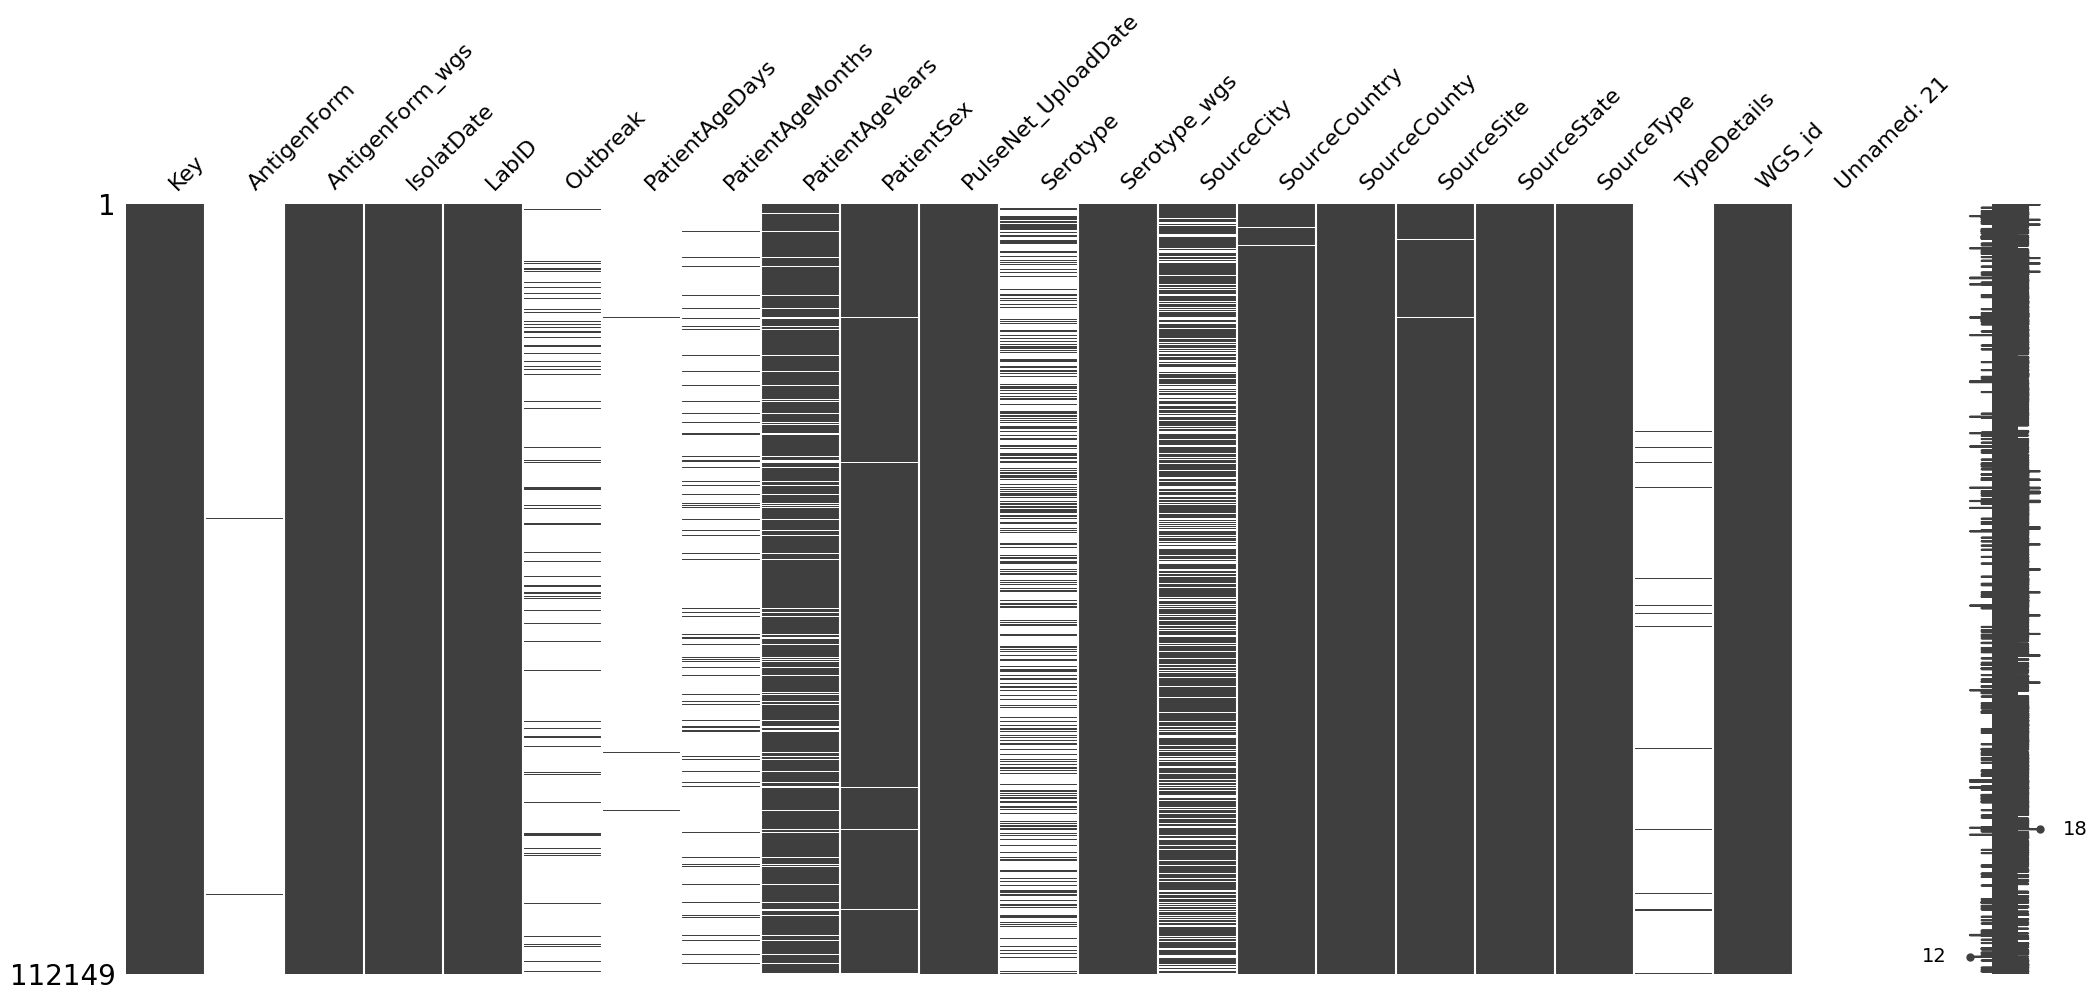

In [4]:
msno.matrix(PN_2020_to_2023_data)

<Axes: >

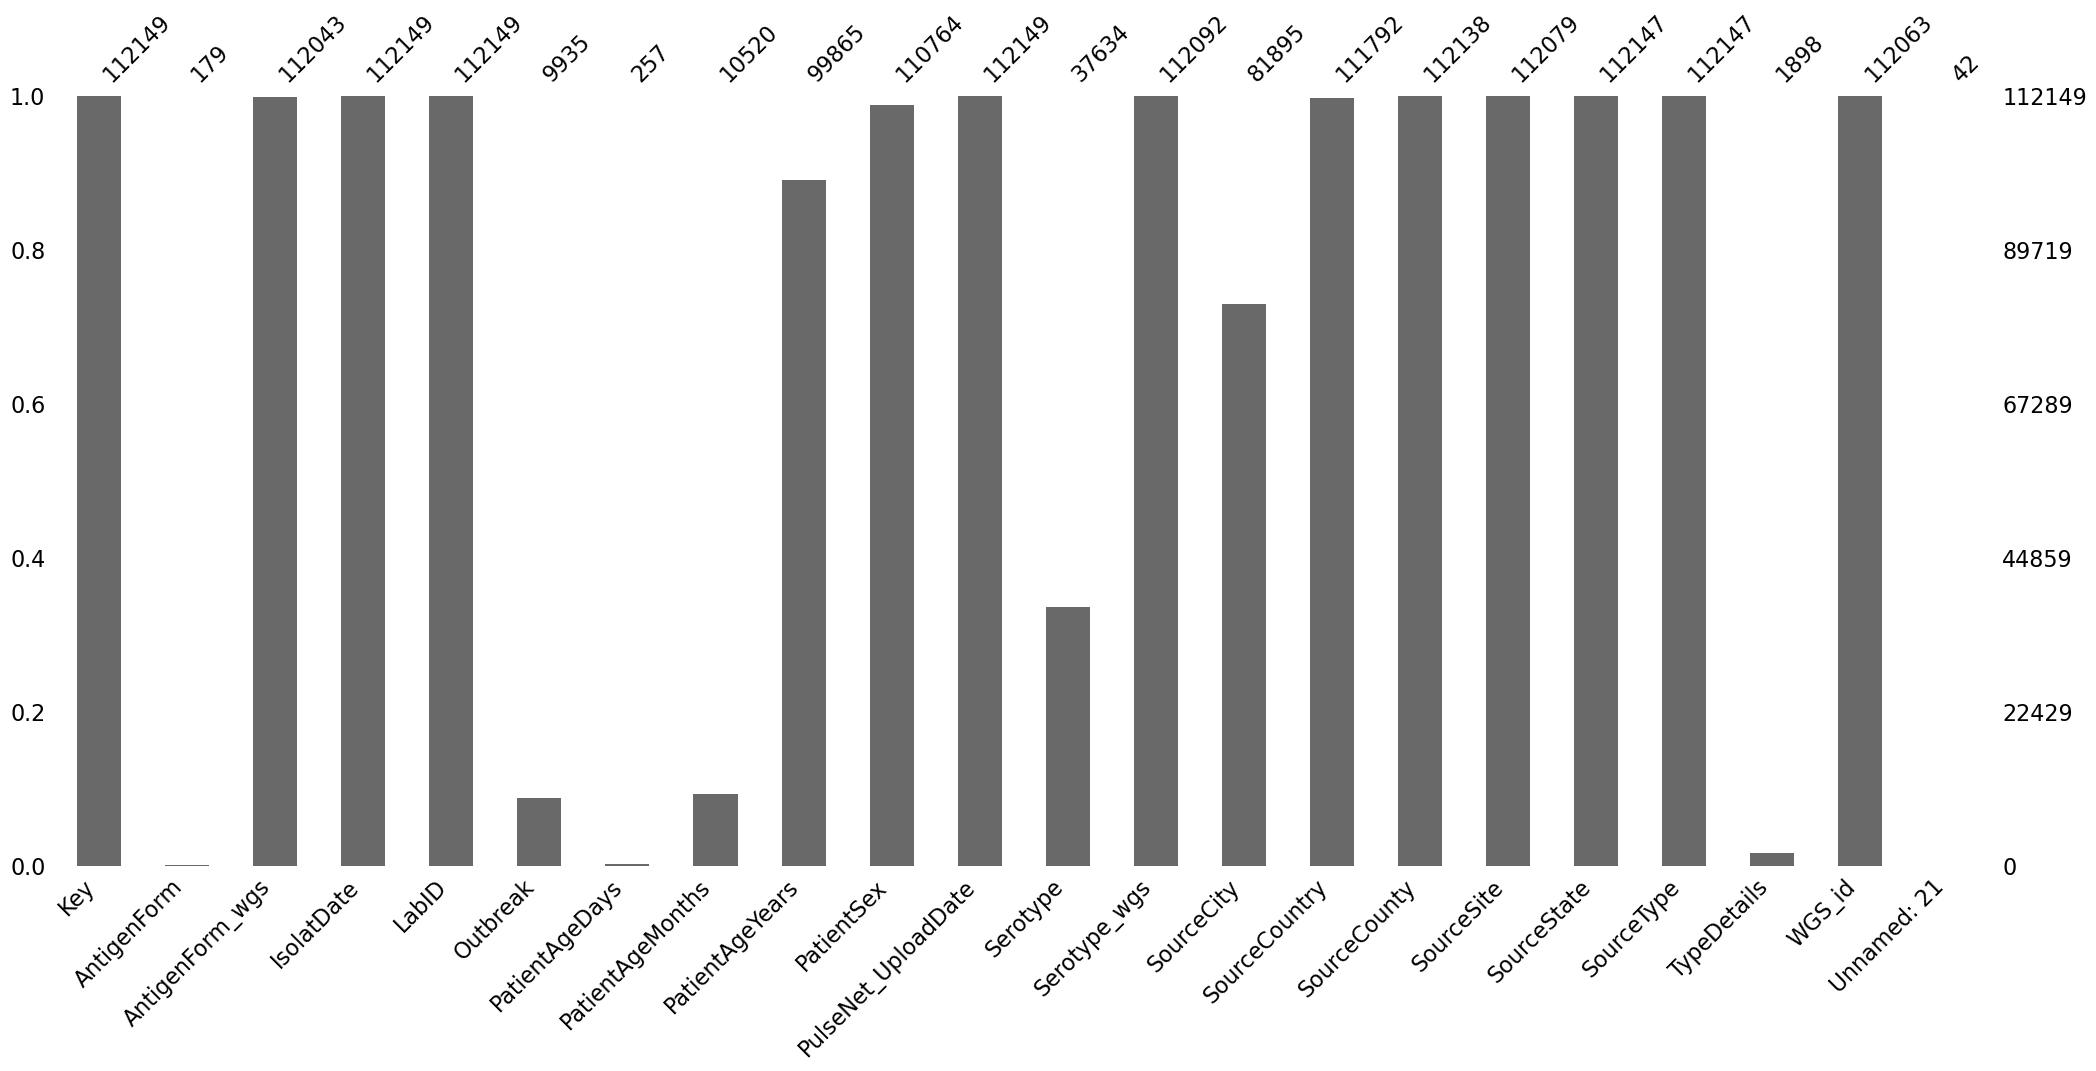

In [ ]:
msno.bar(PN_2020_to_2023_data)

In [6]:
PN_2020_to_2023_data['SourceCounty'].isna().sum()

np.int64(11)

In [ ]:
PN_2020_to_2023_data.sample(5)

,Key,AntigenForm,AntigenForm_wgs,IsolatDate,LabID,Outbreak,PatientAgeDays,PatientAgeMonths,PatientAgeYears,PatientSex,...,Serotype_wgs,SourceCity,SourceCountry,SourceCounty,SourceSite,SourceState,SourceType,TypeDetails,WGS_id,Unnamed: 21
70259,CA___M22X00195,NaN,I 9:d:-,2022-02-01 00:00:00,CA,NaN,NaN,NaN,65,FEMALE,...,Typhi,SAN MARCOS,USA,Riverside,Blood,CA,Human,NaN,PNUSAS259508,NaN
68060,KY___21-108433380-1745,NaN,"I 4:e,h:1,5",2021-12-22 00:00:00,KY,NaN,NaN,NaN,62,MALE,...,Reading,Agusta,USA,Bracken,Stool,KY,Human,NaN,PNUSAS255282,NaN
58864,FL___JBS21003202,NaN,"I 8:e,h:1,2",2021-08-25 00:00:00,FL,NaN,NaN,9,NaN,MALE,...,Newport,NaN,USA,Broward,Stool,FL,Human,NaN,PNUSAS237947,NaN
98300,LAC__T6904_Salmonella,NaN,"I 4:i:1,2",2022-10-19 00:00:00,LAC,NaN,NaN,NaN,69,MALE,...,Typhimurium,NaN,USA,San Diego,Blood,CA,Human,NaN,PNUSAS316309,NaN
68863,NC___MB220119-0054-001,NaN,"I 11:r:e,n,x",2022-01-14 00:00:00,NC,NaN,NaN,NaN,10,FEMALE,...,Rubislaw,Aberdeen,USA,MOORE,Urine,NC,Human,NaN,PNUSAS256819,NaN


In [ ]:
PN_2020_to_2023_data['SourceCounty'].nunique()

2735

In [ ]:
PN_2020_to_2023_data['LabID'].nunique()

57

Convert county names to upper case

In [16]:
PN_2020_to_2023_data['SourceCounty'] = PN_2020_to_2023_data['SourceCounty'].str.upper()

## Trend

Convert isolatedate to proper datetime format

In [ ]:
PN_2020_to_2023_data['IsolatDate'] = pd.to_datetime(PN_2020_to_2023_data['IsolatDate'], errors='coerce', format="%m/%d/%y")

In [ ]:
# verify dates
pd.Timestamp(PN_2020_to_2023_data.iloc[0,3]).day

21

### Cases by date

In [ ]:
PN_2020_to_2023_data.groupby(['IsolatDate'])['Serotype'].count()

IsolatDate
2001-10-31    0
2002-08-05    1
2011-04-21    1
2011-09-10    0
2012-06-12    0
             ..
2023-04-20    1
2023-04-21    1
2023-04-22    1
2023-04-23    0
2023-04-24    0
Name: Serotype, Length: 1416, dtype: int64

In [ ]:
fig = plt.figure()



<Figure size 640x480 with 0 Axes>

## Missouri

In [7]:
PN_2020_to_2023_data[PN_2020_to_2023_data['SourceState']=='MO']['SourceCity'].unique()

array(['COLUMBIA', 'NIXA', 'JEFFERSON CITY', 'KANSAS CITY', "O'FALLON",
       'KIRKWOOD', 'JENNINGS', 'ST. JOSEPH', 'SPRINGFIELD', 'WILLARD',
       'WENTZVILLE', 'HAZELWOOD', 'ST. LOUIS', 'CHESTERFIELD',
       'STE. GENEVIEVE', 'GALENA', 'EAST PRAIRIE', 'HOLTS SUMMIT',
       'ELDON', 'FENTON', 'FLORISSANT', 'BRANSON', 'MANSFIELD', 'MONETT',
       'SARCOXIE', 'WASHINGTON', nan, 'BUTLER', 'BURFORDVILLE', 'MALDEN',
       'LABADIE', 'SRINGFIELD', 'OSAGE BEACH', 'MARYLAND HEIGHTS',
       'REED SPRINGS', 'INDEPENDENCE', 'RICHLAND', 'FULTON',
       'WEST PLAINS', 'Steele', 'SAVANNAH', 'UNION', 'EUREKA',
       'CENTERTOWN', 'ST. CLAIR', 'DE SOTO', 'TIPTON', 'LINN',
       "LEE'S SUMMIT", 'CRYSTAL CITY', 'GLADSTONE', 'KIRKSVILLE',
       'SMITHVILLE', 'GALLATIN', 'REPUBLIC', 'LEBANON', 'BALLWIN',
       'CHILHOWEE', 'ELSBERRY', 'PERRYVILLE', 'WHEATLAND', 'ANDERSON',
       'HENLEY', 'CARL JUNCTION', 'NEOSHO', 'ST. ROBERT', 'BONNE TERRE',
       'ROGERSVILLE', 'LINCOLN', 'MARBLE HILL', 

In [66]:
PN_2020_to_2023_data[PN_2020_to_2023_data['SourceState']=='MO'].groupby('SourceCity')['Serotype_wgs'].count()

SourceCity
ADVANCE        5
AFFTON         3
AFTON          1
AGENCY         1
ALMA           1
              ..
WINONA         2
WINSLOW        1
WRIGHT CITY    4
WYATT          1
Wentzville     1
Name: Serotype_wgs, Length: 514, dtype: int64

## Normalize county names

Check names of counties

In [17]:
for county in PN_2020_to_2023_data.loc[PN_2020_to_2023_data['SourceState']=='MO']['SourceCounty'].unique():
    print(county)

BOONE
CHRISTIAN
COLE
JACKSON
ST. CHARLES
ST. LOUIS
BUCHANAN
GREENE
STE. GENEVIEVE
STONE
MISSISSIPPI
CALLAWAY
MILLER
TANEY
WRIGHT
BARRY
JASPER
FRANKLIN
PLATTE
BATES
CAPE GIRARDEAU
DUNKLIN
PULASKI
HOWELL
MANATEE
ANDREW
CAMDEN
JEFFERSON
MONITEAU
OSAGE
CASS
CLAY
ADAIR
DAVIESS
LACLEDE
NOT WISC
LINCOLN
PERRY
HICKORY
MCDONALD
NEWTON
ST. FRANCOIS
WEBSTER
BENTON
BOLLINGER
CRAWFORD
LAWRENCE
MACON
RANDOLPH
GRUNDY
MONTGOMERY
PEMISCOT
TEXAS
MONROE
PUTNAM
RALLS
BUTLER
SHANNON
STODDARD
DALLAS
LIVINGSTON
OREGON
SALINE
GASCONADE
WAYNE
MORGAN
RIPLEY
SCOTT
COOPER
DEKALB
LAFAYETTE
ST. CLAIR
IRON
JOHNSON
PIKE
BARTON
CHARITON
DOUGLAS
MERCER
NEW MADRID
NODAWAY
POLK
CARTER
WASHINGTON
AUDRAIN
PETTIS
WARREN
RAY
HENRY
MARION
SHELBY
PHELPS
MADISON
REYNOLDS
STE GENEVIEVE
SULLIVAN
LINN
SAINT CHARLES
VERNON
DELAWARE
FRANLIN
ST LOUIS
ST. GENEVIEVE
ST.CHARLES
ST. LOUIS 
DE KALB
ST. LOUIS COUNTY
FANKLIN
ST, LOUIS
CLINTON
GASCONADE 
DADE
ATCHISON
PULAKSI
CALDWELL
GENTRY
HOLT
IZARD
CEDAR
KNOX
CARROLL
HARRISON
MISSISSPPI


Check if county names are similar

In [24]:
from thefuzz import fuzz

def check_similar(string1, string2, thresh=80.0):
    if fuzz.token_sort_ratio(string1, string2) >= thresh:
        return True
    else:
        return False
    
def check_similar_in_list(_string, _list, thresh=80.0):
    for ele in _list:
        if check_similar(ele, _string):
            return True
    return False
        
counties = PN_2020_to_2023_data.loc[PN_2020_to_2023_data['SourceState'] == 'MO']['SourceCounty'].unique()

def group_similar_counties(county_list, thresh=80):
    similar_counties = []

    # Create a boolean array to track which counties have been grouped
    grouped = [False] * len(county_list)

    for i in range(len(county_list)):
        if not grouped[i]:
            # Start a new group for county_list[i]
            similar_counties.append([county_list[i]])
            grouped[i] = True

            # Compare with all remaining counties
            for j in range(i+1, len(county_list)):
                if not grouped[j] and check_similar_in_list(county_list[j], similar_counties[-1], thresh):
                    similar_counties[-1].append(county_list[j])
                    grouped[j] = True  # Mark county_list[j] as grouped

    return similar_counties

similar_counties = group_similar_counties(counties)


In [19]:
similar_counties

[['BOONE'],
 ['CHRISTIAN'],
 ['COLE', 'Cole'],
 ['JACKSON', 'Jackson'],
 ['ST. CHARLES', 'SAINT CHARLES', 'ST.CHARLES', 'St. Charles'],
 ['ST. LOUIS',
  'ST LOUIS',
  'ST. LOUIS ',
  'ST, LOUIS',
  'St. Louis',
  'ST. LOUIS.',
  'ST.LOUIS'],
 ['BUCHANAN'],
 ['GREENE'],
 ['STE. GENEVIEVE', 'STE GENEVIEVE', 'ST. GENEVIEVE', 'STE.GENEVIEVE'],
 ['STONE'],
 ['MISSISSIPPI', 'MISSISSPPI'],
 ['CALLAWAY'],
 ['MILLER'],
 ['TANEY'],
 ['WRIGHT'],
 ['BARRY'],
 ['JASPER'],
 ['FRANKLIN', 'FRANLIN', 'FANKLIN'],
 ['Platte', 'PLATTE'],
 ['BATES'],
 ['CAPE GIRARDEAU'],
 ['DUNKLIN', 'Dunklin'],
 ['PULASKI', 'PULAKSI'],
 ['HOWELL', 'HOWELL '],
 ['Manatee'],
 ['ANDREW'],
 ['CAMDEN'],
 ['JEFFERSON'],
 ['MONITEAU'],
 ['OSAGE'],
 ['CASS'],
 ['CLAY', 'Clay'],
 ['ADAIR'],
 ['DAVIESS', 'Daviess'],
 ['LACLEDE'],
 ['NOT WISC'],
 ['LINCOLN'],
 ['PERRY', 'Perry'],
 ['HICKORY'],
 ['MCDONALD', 'McDonald'],
 ['NEWTON', 'Newton'],
 ['ST. FRANCOIS', 'Saint Francois'],
 ['WEBSTER'],
 ['BENTON'],
 ['BOLLINGER', 'BOLINGER'],

## Study grouping threshold

In [22]:
pop_per_county_path = "c:/Users/Zayan/Documents/code/personal_repos/salmonella/Data/raw_data/census data/usa_2020_to_2023.xlsx"

def get_population(population_xlsx_path, state_long, year) -> pd.DataFrame:
    # read excel file
    population_xlsx = pd.ExcelFile(population_xlsx_path)
    sheet_name = population_xlsx.sheet_names[0]  # census population xlsx file has only 1 sheet
    population_data = pd.read_excel(population_xlsx, sheet_name=sheet_name, skiprows=3)  # first 3 rows are irrelevant
    population_data = population_data[:-6]  # last 6 rows are irrelevant
    population_data = population_data.drop(columns=population_data.columns[1])  # 2nd column is irrelevant

    # Rename County column
    population_data.rename(columns={population_data.columns[0]: "COUNTY"}, inplace=True)

    # Filter data to get state population
    state_population = population_data.loc[population_data['COUNTY'].str.lower().str.contains(state_long.lower())].reset_index(drop=True)

    # Remove the leading '.', ', Missouri' and 'County' from all rows in 'County' column
    state_population["COUNTY"] = state_population["COUNTY"].str.lstrip('.')
    state_population["COUNTY"] = state_population["COUNTY"].str.replace(f", {state_long}", "", regex=False)
    state_population["COUNTY"] = state_population["COUNTY"].str.replace("County", "", regex=False)
    state_population["COUNTY"] = state_population["COUNTY"].str.strip()
    state_population["COUNTY"] = state_population["COUNTY"].str.upper()

    return state_population[["COUNTY", year]]

pop_data = get_population(pop_per_county_path, 'Missouri', 2020)

# MPI

In [ ]:
FSIS_MPI_5000_to_6000_data = pd.read_csv(f"{FSIS_MPI_dir}/FSIS_coords/MPI_5001-6000_geocodio.csv")

In [ ]:
FSIS_MPI_5000_to_6000_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EstNumber         1000 non-null   object 
 1   Establishment
ID  1000 non-null   int64  
 2   Company           1000 non-null   object 
 3   Street            1000 non-null   object 
 4   City              1000 non-null   object 
 5   State             1000 non-null   object 
 6   Zip               1000 non-null   int64  
 7   Phone             847 non-null    object 
 8   GrantDate         969 non-null    object 
 9   Activities        974 non-null    object 
 10  DBAs              391 non-null    object 
 11  Latitude          1000 non-null   float64
 12  Longitude         1000 non-null   float64
 13  Accuracy Score    1000 non-null   float64
 14  Accuracy Type     1000 non-null   object 
 15  Number            924 non-null    object 
 16  Street.1          955 non-null    object 
 

## Raw Poultry

In [ ]:
# paths
current_data_path = "c:/Users/Zayan/Documents/code/personal_repos/salmonella/Data/FSIS_raw_poultry/Dataset_RawPoultry_Current/FSIS_Raw_Poultry_Current_Extracted_2024_04_23.csv"

In [ ]:

FSIS_raw_poultry_current_data = pd.read_csv(current_data_path)

In [ ]:
FSIS_raw_poultry_current_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EstablishmentID                    7597 non-null   int64  
 1   EstablishmentNumber                7597 non-null   object 
 2   EstablishmentName                  7597 non-null   object 
 3   State                              7597 non-null   object 
 4   ProjectCode                        7597 non-null   object 
 5   ProjectName                        7597 non-null   object 
 6   ProductType                        3977 non-null   object 
 7   FormID                             7597 non-null   int64  
 8   CollectionDate                     7597 non-null   object 
 9   SampleSource                       7597 non-null   object 
 10  SalmonellaSpAnalysis               7594 non-null   object 
 11  SalmonellaSerotype                 709 non-null    objec

In [ ]:
FSIS_raw_poultry_current_data.head()

,EstablishmentID,EstablishmentNumber,EstablishmentName,State,ProjectCode,ProjectName,ProductType,FormID,CollectionDate,SampleSource,...,CampylobacterLari,CampylobacterPFGEPrimaryPattern,CampylobacterPFGESecondaryPattern,CampylobacterAlleleCode,CampyFSISNumber,CampyAMRResistanceProfileAST,CampyAMRResistanceProfileWGS,AerobicCountMPNml,AerobicCountMPNg,EBMPNml
0,2160,P19112,Perdue Foods LLC,KY,HC_CH_CARC01,HACCP: Verification for young chicken carcasses,NaN,103274153,2023-10-01,Animal-Chicken-Broiler / Young Chicken Carcass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3879,P7085+V7085,"Tyson Foods, Inc",OK,HC_CPT_LBW01,"Sampling for chicken parts – legs, breasts, an...",Breast,103276274,2023-10-01,Product-Raw-Intact-Chicken,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,NaN,NaN
2,4505,P519,Amick Farms LLC,MS,HC_CH_CARC01,HACCP: Verification for young chicken carcasses,NaN,103278617,2023-10-01,Animal-Chicken-Broiler / Young Chicken Carcass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,P32,"Mar-Jac Poultry, Inc.",GA,HC_CPT_LBW01,"Sampling for chicken parts – legs, breasts, an...",Breast,103278594,2023-10-02,Product-Raw-Intact-Chicken,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN
4,9,P177,Pilgrim's Pride Corporation,GA,HC_CPT_LBW01,"Sampling for chicken parts – legs, breasts, an...",Wing,103277782,2023-10-02,Product-Raw-Intact-Chicken,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN


# Social Vulnerability

In [3]:
SVI_data = pd.read_csv("c:/Users/Zayan/Documents/code/personal_repos/salmonella/Data/raw_data/social_vulnerability_index/SVI_2022_US_county.csv")

In [6]:
SVI_data.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,1,Alabama,AL,1001,Autauga County,1001,"Autauga County, Alabama",594.454786,58761,0,24457,41,22308,369,11780,1363,752,215,4389,582,3857,512,4225,753,9176,98,13766,42,9425,631,1247,296,203,198,16126,224,970,374,3805,440,307,163,888,237,551,21,20.2,2.3,2.8,0.8,19.7,2.6,9.6,1.3,7.4,1.3,15.6,0.2,23.4,0.1,16.4,1.1,5.6,1.3,0.4,0.4,27.4,0.4,3.9,1.5,15.6,1.8,1.4,0.7,4.0,1.1,0.9,0.0,0.3621,0.1457,0.3388,0.4276,0.4120,1.6862,0.2367,0.1718,0.6962,0.5581,0.5304,0.3150,2.2715,0.3675,0.6354,0.6354,0.6354,0.5921,0.6892,0.3198,0.2491,0.1091,1.9593,0.2358,6.5524,0.2663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42938,2425,385,11496,525,1864,0,636,213,59,71,0,30,1930,598,141,183,10.9,1.7,19.6,0.9,3.2,0.0,1.1,0.4,0.1,0.1,0.0,0.1,3.3,1.0,0.2,0.3
1,1,Alabama,AL,1003,Baldwin County,1003,"Baldwin County, Alabama",1589.861817,233420,0,125113,85,90802,1229,42088,2875,3825,609,21039,1527,14031,1216,21472,1920,49499,64,49396,0,31878,1668,3849,567,1741,496,41259,1020,20730,1122,12752,1015,1801,432,2056,396,3401,75,18.3,1.3,3.4,0.6,23.2,1.7,8.4,0.7,9.3,0.8,21.2,0.1,21.2,0.0,13.9,0.7,4.2,0.6,0.8,0.2,17.7,0.4,16.6,0.9,10.2,0.8,1.9,0.3,2.3,0.4,1.5,0.0,0.2638,0.2393,0.6297,0.3303,0.5727,2.0358,0.3433,0.6755,0.3910,0.3261,0.2412,0.5180,2.1518,0.2883,0.4890,0.4890,0.4890,0.9535,0.5068,0.5087,0.0563,0.3299,2.3552,0.4308,7.0318,0.3487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,226339,9867,998,19318,730,11210,0,2046,347,512,187,22,26,7159,918,992,807,10.9,1.1,8.3,0.3,4.8,0.0,0.9,0.1,0.2,0.1,0.0,0.1,3.1,0.4,0.4,0.3
2,1,Alabama,AL,1005,Barbour County,1005,"Barbour County, Alabama",885.007619,24877,0,11673,52,9016,304,8248,594,516,162,2260,321,4155,360,2348,318,4926,28,5151,26,3970,394,1012,169,467,239,13793,174,154,85,3409,323,345,157,1058,193,2988,104,37.7,2.7,5.8,1.8,25.1,3.5,23.5,2.0,10.7,1.4,19.8,0.1,20.7,0.1,18.1,1.8,11.3,1.8,2.0,1.0,55.4,0.7,1.4,0.7,29.2,2.8,3.8,1.3,11.7,2.1,12.0,0.4,0.9360,0.7082,0.7556,0.9618,0.6701,4.0317,0.9399,0.5453,0.3331,0.6974,0.9701,0.7773,3.3232,0.9399,0.8941,0.8941,0.8941,0.2494,0.9373,0.8587,0.9586,0.9551,3.9591,0.9959,12.2081,0.9927,1,0,0,1,0,2,0,0,0,1,0,1,0,0,0,1,0,1,1,3,6,27455,2865,304,11662,218,1202,0,126,26,63,37,3,4,447,174,290,201,31.8,3.3,46.9,0.9,4.8,0.0,0.5,0.1,0.3,0.1,0.0,0.1,1.8,0.7,1.2,0.8
3,1,Alabama,AL,1007,Bibb County,1007,"Bibb County, Alabama",622.469286,22251,0,9046,97,7216,252,6047,940,786,269,1671,336,3366,440,1760,386,3734,131,4715,97,4097,474,515,183,61,106,5731,34,236,161,2765,388,94,64,544,255,1421,278,29.0,4.5,8.7,3.0,23.2,4.6,21.1,2.8,8.4,1.9,16.8,0.6,21.2,0.4,19.6,2.2,7.2,2.5,0.3,0.5,25.8,0.2,2.7,1.8,3

In [7]:
SVI_data.shape

(3144, 158)

In [8]:
SVI_data.describe()

,ST,STCNTY,FIPS,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
count,3144.000000,3144.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3.144000e+03,3144.000000,3.144000e+03,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3.144000e+03,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3144.000000,3.144000e+03,3144.000000,3.144000e+03,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000
mean,30.264313,30368.187023,30368.187023,1123.812856,1.053109e+05,5.687023,4.482939e+04,66.367366,3.999248e+04,378.694975,2.106673e+04,1156.894402,2844.784669,306.659987,1.048529e+04,538.670483,7.824331e+03,482.839695,9006.072519,668.438613,1.741019e+04,71.241730,2.328680e+04,42.700064,1.334016e+04,641.028626,2496.138041,269.027672,4.065481e+03,301.699427,4.332415e+04,238.541667,6386.652990,306.473601,2586.070293,284.316794,1343.984415,170.747137,3331.701654,265.975509,2577.382634,-1.766417e+05,23.954580,3.160846,4.951336,1.657665,21.855153,3.332316,11.646406,1.913200,9.512945,1.864090,19.703753,0.598728,21.896724,0.519656,16.185305,1.843639,5.734606,1.748378,1.589440,4.513836,25.289726,1.146438,4.896978,1.137659,12.22519

In [9]:
for column in SVI_data[['ST', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION']].columns:
    print(f"{column}:",SVI_data[column].nunique())

ST: 51
STCNTY: 3144
COUNTY: 1882
FIPS: 3144
LOCATION: 3144


In [10]:
svi_mo = SVI_data.loc[SVI_data['ST_ABBR'] == 'MO']

print("Missouri")
print("---------")
for column in svi_mo[['ST', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION']].columns:
    print(f"{column}:",svi_mo[column].nunique())

Missouri
---------
ST: 1
STCNTY: 115
COUNTY: 115
FIPS: 115
LOCATION: 115


In [11]:
svi_mo

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
1485,29,Missouri,MO,29001,Adair County,29001,"Adair County, Missouri",567.323630,25299,0,11354,33,8864,311,7593,698,590,249,2084,281,1110,175,2021,501,3760,34,4599,93,2881,367,304,107,309,154,2932,39,350,142,830,146,128,74,622,154,2390,60,32.9,3.0,5.5,2.2,23.5,3.1,8.0,1.3,8.1,2.0,14.9,0.1,18.2,0.4,11.5,1.5,3.4,1.2,1.3,0.6,11.6,0.2,3.1,1.3,7.3,1.3,1.4,0.7,7.0,1.7,9.4,0.2,0.8552,0.6583,0.6583,0.2934,0.4741,2.9393,0.6494,0.1384,0.1279,0.1311,0.1231,0.6612,1.1817,0.0143,0.3420,0.3420,0.3420,0.5062,0.3707,0.3198,0.7203,0.9287,2.8457,0.6837,7.3087,0.4006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,27847,1677,237,1043,75,702,0,472,122,89,37,13,19,606,149,7,9,18.9,2.6,4.1,0.3,2.8,0.0,1.9,0.5,0.4,0.1,0.1,0.1,2.4,0.6,0.0,0.1
1486,29,Missouri,MO,29003,Andrew County,29003,"Andrew County, Missouri",432.631321,18069,0,7532,31,6865,173,2618,440,371,100,1253,252,700,184,1122,199,3598,71,4142,89,2150,245,263,91,2,73,1270,86,169,113,466,96,22,15,239,117,183,44,14.7,2.5,4.1,1.1,18.3,3.6,5.5,1.5,6.3,1.1,19.9,0.4,22.9,0.5,12.1,1.4,3.8,1.3,0.0,0.4,7.0,0.5,2.2,1.5,6.2,1.3,0.3,0.2,3.5,1.7,1.0,0.2,0.1155,0.3668,0.2243,0.0853,0.2981,1.0900,0.0970,0.5558,0.6312,0.1763,0.1734,0.0000,1.5367,0.0480,0.1508,0.1508,0.1508,0.3853,0.3185,0.0315,0.1833,0.1403,1.0589,0.0248,3.8364,0.0169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10026,1382,218,140,85,485,0,125,22,5,7,0,19,513,136,2,3,20.1,3.1,0.8,0.5,2.7,0.0,0.7,0.1,0.0,0.1,0.0,0.2,2.8,0.8,0.0,0.1
1487,29,Missouri,MO,29005,Atchison County,29005,"Atchison County, Missouri",547.285156,5270,0,2746,27,2351,79,1321,188,68,32,397,62,360,71,602,89,1335,15,1092,24,899,92,126,42,9,61,296,60,39,20,68,27,44,31,103,32,99,10,25.5,3.6,2.6,1.2,16.9,2.6,9.3,1.8,11.6,1.7,25.3,0.3,20.7,0.5,17.3,1.8,5.4,1.8,0.2,1.2,5.6,1.1,1.4,0.7,2.5,1.0,1.9,1.1,4.4,1.4,1.9,0.2,0.6109,0.1225,0.1451,0.4031,0.7273,2.0089,0.3347,0.8867,0.3331,0.6341,0.4922,0.1661,2.5122,0.5399,0.0757,0.0757,0.0757,0.2494,0.1129,0.5087,0.3217,0.4620,1.6547,0.1339,6.2515,0.2249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4250,451,72,16,16,85,0,11,20,16,11,6,8,160,70,2,3,19.2,3.1,0.3,0.3,1.6,0.0,0.2,0.4,0.3,0.2,0.1,0.2,3.0,1.3,0.0,0.1
1488,29,Missouri,MO,29007,Audrain County,29007,"Audrain County, Missouri",692.249287,24873,0,10563,46,8968,240,7016,805,449,170,1687,268,2289,395,3536,632,4469,75,5615,49,4581,486,627,157,168,145,3241,65,251,129,687,194,198,78,601,130,1403,59,29.8,3.4,3.9,1.5,18.8,2.9,13.2,2.3,15.0,2.7,18.0,0.3,22.6,0.2,19.4,2.1,7.0,1.7,0.7,0.6,13.0,0.3,2.4,1.2,6.5,1.8,2.2,0.7,6.7,1.4,5.6,0.2,0.7741,0.3296,0.2641,0.6685,0.8654,2.9017,0.6338,0.3598,0.5870,0.77

In [20]:
svi_mo[['LOCATION','EP_HBURD', 'E_HBURD', 'E_TOTPOP']][svi_mo['LOCATION']=='Boone County, Missouri']

,LOCATION,EP_HBURD,E_HBURD,E_TOTPOP
1494,"Boone County, Missouri",27.8,20635,184043


# Population data

In [7]:
def get_population(population_xlsx_path, state_long, year) -> pd.DataFrame:
    # read excel file
    population_xlsx = pd.ExcelFile(population_xlsx_path)
    sheet_name = population_xlsx.sheet_names[0]  # census population xlsx file has only 1 sheet
    population_data = pd.read_excel(population_xlsx, sheet_name=sheet_name, skiprows=3)  # first 3 rows are irrelevant
    population_data = population_data[:-6]  # last 6 rows are irrelevant
    population_data = population_data.drop(columns=population_data.columns[1])  # 2nd column is irrelevant

    # Rename County column
    population_data.rename(columns={population_data.columns[0]: "COUNTY"}, inplace=True)

    # Filter data to get state population
    state_population = population_data.loc[population_data['COUNTY'].str.lower().str.contains(state_long.lower())].reset_index(drop=True)

    # Remove '.', ', Missouri' and 'County' from all rows in 'County' column
    state_population["COUNTY"] = state_population["COUNTY"].str.replace(".", "", regex=False)
    state_population["COUNTY"] = state_population["COUNTY"].str.replace(f", {state_long}", "", regex=False)
    state_population["COUNTY"] = state_population["COUNTY"].str.replace("County", "", regex=False)
    state_population["COUNTY"] = state_population["COUNTY"].str.strip()
    state_population["COUNTY"] = state_population["COUNTY"].str.upper()

    return state_population[["COUNTY", year]]


In [46]:
population_data_path = f"c:/Users/Zayan/Documents/code/personal_repos/salmonella/Data/raw_data/census data/usa_2020_to_2023.xlsx"
state = 'Missouri'
year = 2020
population_data = get_population(population_data_path, state, year)

In [34]:
population_data.head()

,COUNTY,2020
0,ADAIR,25268.0
1,ANDREW,18103.0
2,ATCHISON,5306.0
3,AUDRAIN,24786.0
4,BARRY,34544.0


In [47]:
population_data = population_data.sort_values(by='COUNTY').reset_index(drop=True)